In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
df = pd.read_csv("patents_cleaned.csv")

citation_columns = [
    'patent_num_cited_by_us_patents',
    'patent_num_combined_citations',
    'patent_num_foreign_citations',
    'patent_num_us_application_citations',
    'patent_num_us_patent_citations',
]

cleaned_data = df[citation_columns].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)
normalized_data = scaler.fit_transform(cleaned_data)

pca = PCA(n_components=3)
pca_data = pca.fit_transform(normalized_data)


In [12]:
k_values = [2, 3, 4, 5, 6]

def kmeans_with_silhouette(pca_data, k_values):
    silhouette_scores = []
    cluster_centers = []
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(pca_data)
        silhouette_avg = silhouette_score(pca_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        cluster_centers.append(kmeans.cluster_centers_)
    
    return silhouette_scores, cluster_centers

def plot_kmeans(pca_data, k, cluster_centers):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_data)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=cluster_labels, cmap='viridis', s=50)
    
    # Plot centroids
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], s=300, c='red', marker='X')

    ax.set_title(f'K-Means Clustering for k={k}')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    
    plt.show()

silhouette_scores, cluster_centers = kmeans_with_silhouette(pca_data, k_values)
print("Silhouette Scores for different k values in K-Means:", silhouette_scores)

Silhouette Scores for different k values in K-Means: [0.9648893327852213, 0.949203713901756, 0.9424364099719862, 0.865864279781593, 0.8076034371441247]


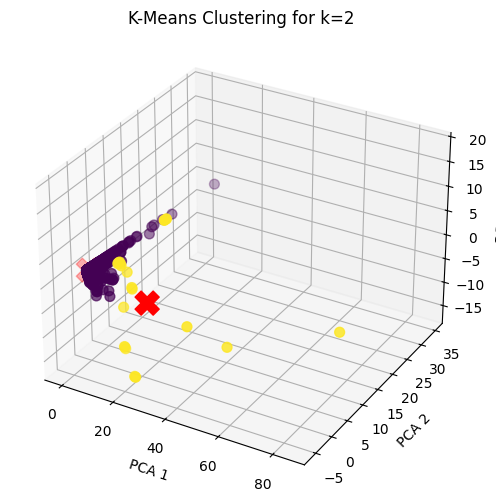

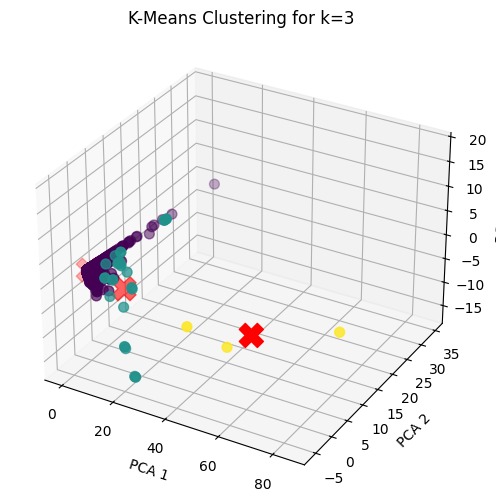

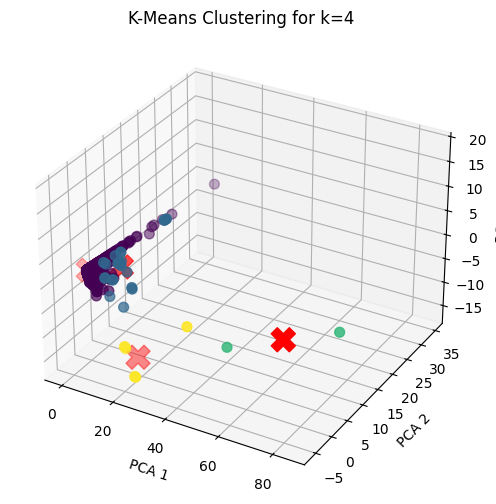

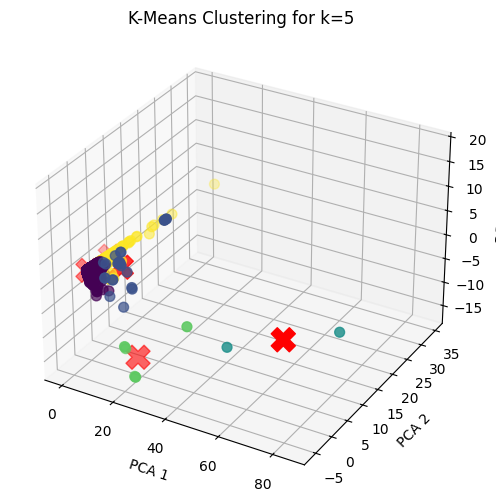

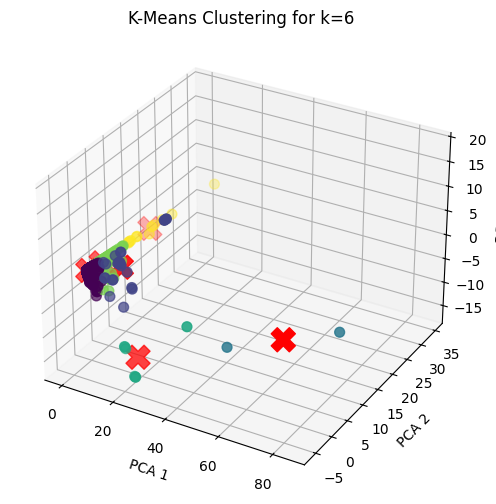

In [13]:
for i, k in enumerate(k_values):
    plot_kmeans(pca_data, k, cluster_centers[i])

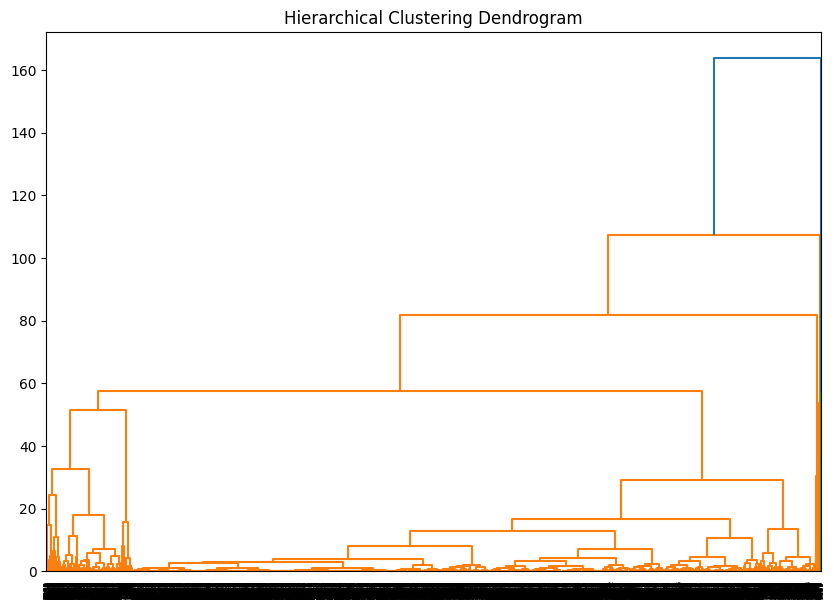

In [9]:
linked = linkage(pca_data, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

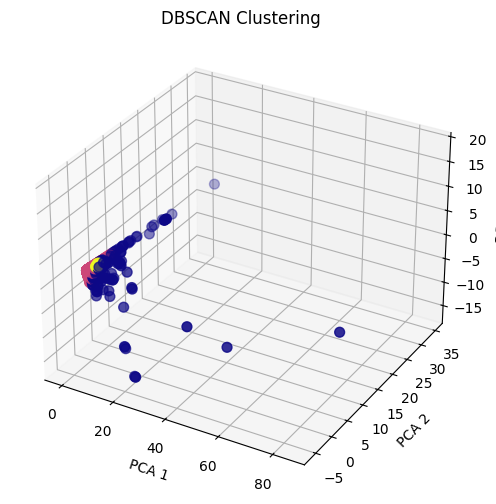

In [10]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=dbscan_labels, cmap='plasma', s=50)

ax.set_title('DBSCAN Clustering')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()